*Alexis Adrian Carrillo Medina (316733780)*

---
<center> <h1>  <b> Simulacion Estocastica </b> <br>
<b> Proyecto 1 </b>
<hr>

### **Bibliotecas**

In [1]:
using Random, Distributions, Plots, StatsPlots

### **2) Simule una distribucion trivariada dada por marginales , en orden, Gamma(2,3), Uniforme(-1,1), Normal(0,1) y una copula Gaussiana con matriz de varianza-covarianza**
### $$\begin{pmatrix} 2.0 & -1.0 & 0.0 \\ -1.0 & 2.0 & -1.0 \\ 0.0 & -1.0 & 2.0 \end{pmatrix}$$
### **Tambien un vector con marginales Exponencial(0.5), Exponencial(2.0) y la copula de Clayton $C(u_1,u_2)=(max\{u_1^{-\theta}+u_2^{-\theta}-1,0\})^{\frac{1}{\theta}}$ para $\theta \in \{0.01,1,100\}$**

#### ***Solucion:***

#### **Distribucion trivariada con marginales Gamma(2,3), Uniforme(-1,1), Normal(0,1)**

Lo primero sera simular la copula gaussiana, para ello simulemos una normal multivariada dada por la matriz de varianza-covarianza definida con anterioridad

In [2]:
# Numero de variables a simular
n=1000

# Matriz de Varianza-Covarianza
Σ=Matrix{Float64}(undef,3,3)
Σ[1,1]=2
Σ[1,2]=-1
Σ[1,3]=0
Σ[2,1]=-1
Σ[2,2]=2
Σ[2,3]=-1
Σ[3,1]=0
Σ[3,2]=-1
Σ[3,3]=2

# Simulacion de X
X=rand(MvNormal(Σ),n)

3×1000 Array{Float64,2}:
  0.947032   -1.39252  -0.717828  …   0.296191  -1.02174   1.15759
 -0.0605681   1.85226   1.61071      -1.65073    2.91432  -0.427252
 -0.628792   -1.55773  -1.38119       0.148207  -1.82378   1.46008

Entonces, $X=(X_1 \ldots X_n)$ es un vector aleatorio con distribucion dada por una normal multivariada con la matriz de Varianza-Covarianza definida anteriormente<br>
Ahora, recordemos que una copula gaussiana $C$ esta dada por

$$C(u_1,\ldots,u_n)=\mathbb{P}(U_1 \leq u_1, \ldots U_n  \leq u_n)=\Phi(\Phi_1^{-1}(u_1), \ldots, \Phi_n^{-1}(u_n)) $$

Por lo que para simular de una copula gaussiana realizamos: sea $U$ un vector aleatoria tal que

$$U=(U_1, \ldots U_n)=(\Phi_1(X_1), \ldots, \Phi_n(X_n)) $$

Por lo tanto $U$, es la simulacion de la copula gaussiana $C$ <br>
Simulemos ahora la copula con la definicion de arriba

In [3]:
U=Matrix{Float64}(undef,3,n)
U[1,:]=cdf(Normal(0,1),X[1,:])
U[2,:]=cdf(Normal(0,1),X[2,:])
U[3,:]=cdf(Normal(0,1),X[3,:])
U

3×1000 Array{Float64,2}:
 0.828189  0.0818829  0.236432   0.161611  …  0.616458   0.153453   0.876485
 0.475852  0.968006   0.946379   0.167274     0.0493971  0.998218   0.334598
 0.264742  0.0596484  0.0836097  0.955571     0.55891    0.0340926  0.927866

Ya que tenemos una simulacion de la Copula Gaussiana, veamos una grafica de ella

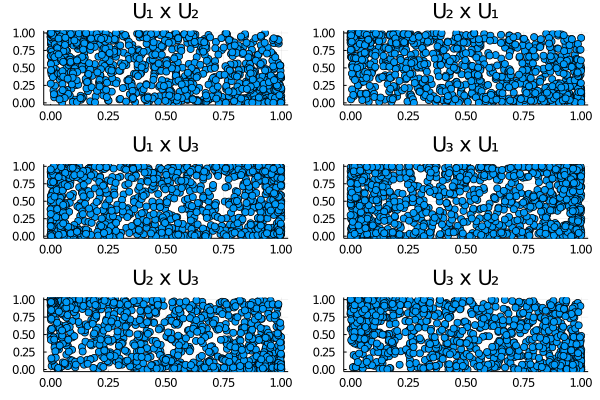

In [4]:
p1=scatter(U[1,:],U[2,:],title="U₁ x U₂")
p2=scatter(U[2,:],U[1,:],title="U₂ x U₁")
p3=scatter(U[1,:],U[3,:],title="U₁ x U₃")
p4=scatter(U[3,:],U[1,:],title="U₃ x U₁")
p5=scatter(U[2,:],U[3,:],title="U₂ x U₃")
p6=scatter(U[3,:],U[2,:],title="U₃ x U₂")

plot(p1,p2,p3,p4,p5,p6, layout=(3,2),legend=false)

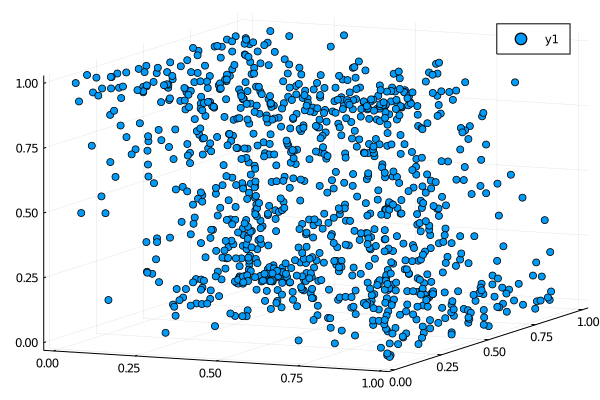

In [5]:
plot(U[1,:],U[2,:], U[3,:],seriestype=:scatter)

Todo parece coincidir de manera correcta <br>
Ahora, sea $Q$ el vector multivariado con las marginales que buscamos. Entonces

$$ Q = (F_1^{-1}(U_1),F_2^{-1}(U_2),F_3^{-1}(U_3))$$

Simulemos de nuevo

In [6]:
Q=Matrix{Float64}(undef,3,n)
Q[1,:]=quantile(Gamma(2,3),U[1,:])
Q[2,:]=quantile(Uniform(-1,1),U[2,:])
Q[3,:]=quantile(Normal(0,1),U[3,:])
Q

3×1000 Array{Float64,2}:
  9.58599     1.41649    2.77299   …   6.25437    2.07967   10.8668
 -0.0482969   0.936011   0.892757     -0.901206   0.996435  -0.330804
 -0.628792   -1.55773   -1.38119       0.148207  -1.82378    1.46008

Veamos una grafica de sus marginales

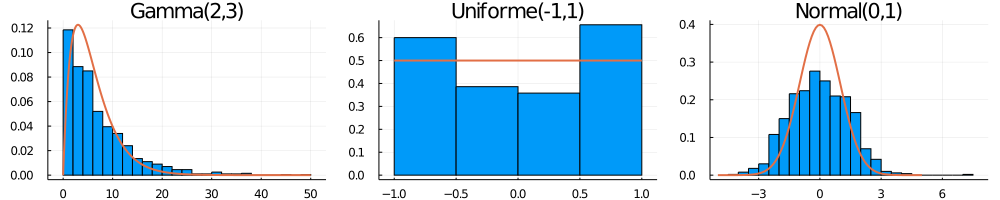

In [7]:
p1=histogram(Q[1,:],normed=true,title="Gamma(2,3)",label="Simulacion")
p1=plot!(range(0,stop=50,step=0.1),pdf(Gamma(2,3),range(0,stop=50,step=0.1)),lw=2,label="Teorica")

p2=histogram(Q[2,:],normed=true,title="Uniforme(-1,1)",label="Simulacion")
p2=plot!(range(-1,stop=1,step=0.1),pdf(Uniform(-1,1),range(-1,stop=1,step=0.1)),lw=2,label="Teorica")

p3=histogram(Q[3,:],normed=true,title="Normal(0,1)",label="Simulacion")
p3=plot!(range(-5,stop=5,step=0.1),pdf(Normal(0,1),range(-5,stop=5,step=0.1)),lw=2,label="Teorica")

plot(p1,p2,p3,layout=(1,3),legend=false,size = (1000, 200))

#### **Vector con marginales Exp(0.5), Exp(2.0)**

Como en el anterior caso, lo primero es simular de la copula $C$.
Para ello ocupamos el algoritmo siguiente: <br>

1) Generamos $X\sim Exp(1)$, $Y \sim Exp(1)$ y $Z \sim \Gamma(\theta,1)$, $X$ independiente de $Y$ <br>
2) Definimos $u=[1+\frac{x}{z}]^{-\theta}$ y $v=[1+\frac{y}{z}]^{-\theta}$, entonces el par $(u,v) \sim \mathcal{L}(C)$ 


El cual esta sustentado en el siguiente [link](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiM3sHFy5ruAhWLv1kKHWgdCKgQFjAAegQIAhAC&url=https%3A%2F%2Flink.springer.com%2Fcontent%2Fpdf%2Fbbm%253A978-1-4020-4415-1%252F1.pdf&usg=AOvVaw0_ymBnTLStz9IUzHYwZBWv)

In [8]:
# Numero de variables a simular
n=1000

# Valores para θ
θ=[0.01,1,100]

# Matrices de cada simulacion
Q₁=Matrix{Float64}(undef,2,n)
Q₂=Matrix{Float64}(undef,2,n)
Q₃=Matrix{Float64}(undef,2,n)

2×1000 Array{Float64,2}:
 -2.61173e307    4.00458e47   -8.44766e-51   …  8.48798e-314  NaN
 -6.58288e-258  -5.9545e-264   3.02102e-190     6.91283e-310    5.0e-324

In [9]:
# θ=0.01

x₁=rand(Exponential(1),n)
y₁=rand(Exponential(1),n)
z₁=rand(Gamma(θ[1],1),n)

u₁=(1 .+ (x₁ ./ z₁) ) .^(-θ[1])
v₁=(1 .+ (y₁ ./ z₁) ) .^(-θ[1])

Q₁[1,:]=u₁
Q₁[2,:]=v₁
Q₁

2×1000 Array{Float64,2}:
 0.311077  0.688528  0.962545  0.0223986  …  0.822836  0.537405  0.888761
 0.306613  0.69757   0.960865  0.0224996     0.816025  0.53288   0.85898

In [10]:
# θ=1

x₂=rand(Exponential(1),n)
y₂=rand(Exponential(1),n)
z₂=rand(Gamma(θ[2],1),n)

u₂=(1 .+ (x₂ ./ z₂) ) .^(-θ[2])
v₂=(1 .+ (y₂ ./ z₂) ) .^(-θ[2])

Q₂[1,:]=u₂
Q₂[2,:]=v₂
Q₂

2×1000 Array{Float64,2}:
 0.48723   0.697339  0.516471  0.0879101  …  0.691272  0.261099  0.684262
 0.304165  0.625566  0.618307  0.211095      0.268329  0.374528  0.57639

In [11]:
# θ=100

x₃=rand(Exponential(1),n)
y₃=rand(Exponential(1),n)
z₃=rand(Gamma(θ[3],1),n)

u₃=(1 .+ (x₃ ./ z₃) ) .^(-θ[3])
v₃=(1 .+ (y₃ ./ z₃) ) .^(-θ[3])

Q₃[1,:]=u₃
Q₃[2,:]=v₃
Q₃

2×1000 Array{Float64,2}:
 0.423293  0.794997  0.0726769  0.353858  …  0.426457  0.829964  0.989569
 0.616315  0.582137  0.258608   0.834837     0.215631  0.104929  0.619259

Ya tenemos simuladas todas las copulas, veamos sus graficas

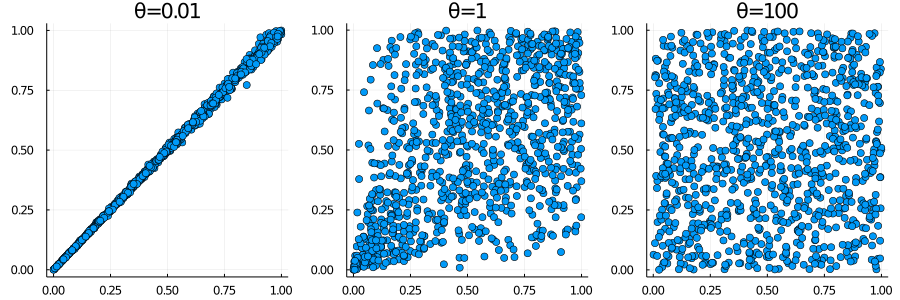

In [12]:
p1=scatter(u₁,v₁,title="θ=0.01")
p2=scatter(u₂,v₂,title="θ=1")
p3=scatter(u₃,v₃,title="θ=100")

plot(p1,p2,p3, layout=(1,3),legend=false,size = (900, 300))

Notemos que, en efecto, coincide con la distribucion de la copula de Clayton <br>
Simulemos ahora la distribucion multivarida; realizaremos lo mismo que con la Copula Gaussiana

In [13]:
#θ=0.01

W₁=Matrix{Float64}(undef,2,n)
W₁[1,:]=quantile(Exponential(0.5),Q₁[1,:])
W₁[2,:]=quantile(Exponential(2),Q₁[2,:])
W₁

2×1000 Array{Float64,2}:
 0.186313  0.583223  1.6423   0.0113266  …  0.865339  0.385451  1.09804
 0.732334  2.39181   6.48147  0.0455131     3.38592   1.52234   3.91771

In [14]:
#θ=1

W₂=Matrix{Float64}(undef,2,n)
W₂[1,:]=quantile(Exponential(0.5),Q₂[1,:])
W₂[2,:]=quantile(Exponential(2),Q₂[2,:])
W₂

2×1000 Array{Float64,2}:
 0.333964  0.59757  0.363322  0.0460084  …  0.587647  0.151296  0.576421
 0.725285  1.96468  1.92628   0.474218      0.624849  0.938496  1.71789

In [15]:
#θ=100

W₃=Matrix{Float64}(undef,2,n)
W₃[1,:]=quantile(Exponential(0.5),Q₃[1,:])
W₃[2,:]=quantile(Exponential(2),Q₃[2,:])
W₃

2×1000 Array{Float64,2}:
 0.275211  0.792366  0.0377266  0.218368  …  0.277961  0.885872  2.28147
 1.91587   1.74521   0.598452   3.60165      0.485753  0.221705  1.93127

Por lo que tenemos simulado el vector $W_i$ que tiene marginales Exponencial(0.5) y Exponencial(0.2) <br>
Veamos las graficas de las marginales para cada valor de $\theta$

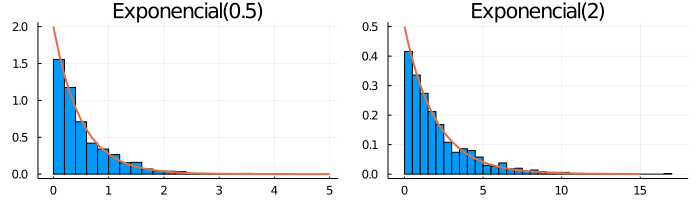

In [16]:
#θ=0.1

p1=histogram(W₁[1,:],normed=true,title="Exponencial(0.5)",label="Simulacion")
p1=plot!(range(0,stop=5,step=0.1),pdf(Exponential(0.5),range(0,stop=5,step=0.1)),lw=2,label="Teorica")

p2=histogram(W₁[2,:],normed=true,title="Exponencial(2)",label="Simulacion")
p2=plot!(range(0,stop=15,step=0.1),pdf(Exponential(2),range(0,stop=15,step=0.1)),lw=2,label="Teorica")

plot(p1,p2,label=(2,1),legend=false,size = (700, 200))

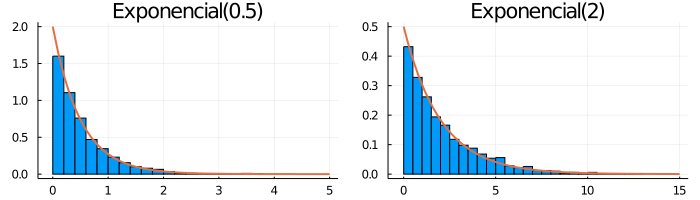

In [17]:
#θ=1

p1=histogram(W₂[1,:],normed=true,title="Exponencial(0.5)",label="Simulacion")
p1=plot!(range(0,stop=5,step=0.1),pdf(Exponential(0.5),range(0,stop=5,step=0.1)),lw=2,label="Teorica")

p2=histogram(W₂[2,:],normed=true,title="Exponencial(2)",label="Simulacion")
p2=plot!(range(0,stop=15,step=0.1),pdf(Exponential(2),range(0,stop=15,step=0.1)),lw=2,label="Teorica")

plot(p1,p2,label=(2,1),legend=false,size = (700, 200))

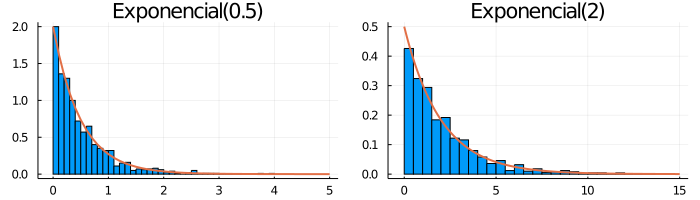

In [18]:
#θ=100

p1=histogram(W₃[1,:],normed=true,title="Exponencial(0.5)",label="Simulacion")
p1=plot!(range(0,stop=5,step=0.1),pdf(Exponential(0.5),range(0,stop=5,step=0.1)),lw=2,label="Teorica")

p2=histogram(W₃[2,:],normed=true,title="Exponencial(2)",label="Simulacion")
p2=plot!(range(0,stop=15,step=0.1),pdf(Exponential(2),range(0,stop=15,step=0.1)),lw=2,label="Teorica")

plot(p1,p2,label=(2,1),legend=false,size = (700, 200))